In [1]:
import os
import matplotlib.pyplot as plt
# import cvxpy as cp
import cvxportfolio as cvx
import yfinance as yf
import pandas as pd
import numpy as np
import datetime

In [10]:
cvx.forecast.HistoricalFactorizedCovariance()

HistoricalFactorizedCovariance(half_life=inf, rolling=inf, kelly=True)

In [110]:
prices = [[100]*10]
cov = np.array([[1., 0.19525643, 0.39917748, -0.39418553, -0.00707647, -0.67112039, 0.01641167, 0.51935931, 0.01156094, -0.12535449],
                    [0.19525643, 1., -0.07321996, -0.21788827, -0.18569623, 0.13150835, -0.60040443, -0.53314565, 0.05302451, -0.26636013],
                    [0.39917748, -0.07321996, 1., -0.15891728, 0.67221197, -0.31235951, 0.53347361, -0.0530431, -0.76791062, -0.45707164],
                    [-0.39418553, -0.21788827, -0.15891728, 1., 0.3489336, 0.35257993, 0.45167662, 0.08117293, 0.09709185, -0.37131356],
                    [-0.00707647, -0.18569623, 0.67221197, 0.3489336, 1., -0.26214982, 0.60173726, 0.02792043, -0.51561155, -0.570016],
                    [-0.67112039, 0.13150835, -0.31235951, 0.35257993, -0.26214982, 1., -0.19752891, -0.61942314, -0.12761225, -0.20618394],
                    [0.01641167, -0.60040443, 0.53347361, 0.45167662, 0.60173726, -0.19752891, 1., 0.3605392, -0.22767222, -0.13848597],
                    [0.51935931, -0.53314565, -0.0530431, 0.08117293, 0.02792043, -0.61942314, 0.3605392, 1., 0.4291785, 0.29031668],
                    [0.01156094, 0.05302451, -0.76791062, 0.09709185, -0.51561155, -0.12761225, -0.22767222, 0.4291785, 1., 0.5735452],
                    [-0.12535449, -0.26636013, -0.45707164, -0.37131356, -0.570016, -0.20618394, -0.13848597, 0.29031668, 0.5735452, 1.]])
mu = np.array([0.09070628, 0.08425672, 0.05552159, 0.06445937, 0.06549034,
     0.06249785, 0.07575028, 0.07677769, 0.0678443, 0.06768946])
chol = np.linalg.cholesky(cov)
for i in range(132):
    
    # var = np.array([0.2883016050152901,
    #      0.2767089786530548,
    #      0.3016807608539017,
    #      0.28464138357960184,
    #      0.3012212929833156,
    #      0.3011256311560061,
    #      0.2790687931600006,
    #      0.29909579739976044,
    #      0.2712623445532055,
    #      0.29409808155927])
    # cov = cov * np.outer(var, var)
    bm = np.random.normal(0, 1, 10)

    prices_temp = mu*132 + bm @ cov
    
    prices.append((prices_temp + prices[-1]).tolist())

# returns = (np.array(returns[1:]) - np.array(returns[:-1]))/np.array(returns[:-1])
returns = ((np.array(prices[1:]) - np.array(prices[:-1]))/np.array(prices[:-1])).T.tolist()
returns.append(np.random.uniform(0.02, 0.03, 132))
returns = np.array(returns)
returns = returns.T
prices = np.array(prices)
volumes = prices*1000000

In [111]:
ret = pd.DataFrame(returns)

datetime_list = []

for i in range(2012,2023):
    for j in range(1,13):
        datetime_list.append(datetime.datetime(i, j, 1))

ret.index = datetime_list

new_column_names = ['Stock ' + str(i + 1) for i in range(len(ret.columns) - 1)] + ['USDOLLAR']
ret.columns = new_column_names


price = pd.DataFrame(prices)
volume = pd.DataFrame(volumes)

datetime_list.insert(0, datetime.datetime(2011, 12, 1))
price.index = datetime_list
volume.index = datetime_list

new_column_names = ['Stock ' + str(i + 1) for i in range(len(ret.columns) - 1)]
price.columns = new_column_names
volume.columns = new_column_names

In [112]:
ret
price
# volume

,Stock 1,Stock 2,Stock 3,Stock 4,Stock 5,Stock 6,Stock 7,Stock 8,Stock 9,Stock 10
2011-12-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2012-01-01,111.116848,111.986403,107.729424,108.981927,110.166893,108.556549,109.213564,108.581778,107.588590,107.068510
2012-02-01,123.213815,125.247109,111.236422,115.667369,114.983170,116.934942,115.508335,118.711774,120.255449,118.630474
2012-03-01,133.995063,135.474813,119.745255,124.017175,125.103651,124.999560,126.751343,127.999141,128.054258,127.641891
2012-04-01,143.898661,145.221093,127.768148,133.893847,135.214094,134.048394,138.545657,137.364515,135.848709,136.581669
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,1634.484061,1533.114604,1030.015754,1187.705184,1197.312877,1156.377010,1372.212648,1395.607817,1255.242060,1248.328801
2022-09-01,1647.404254,1544.207699,1039.617170,1196.302479,1208.081593,1164.012066,1382.842463,1405.425554,1261.697591,1254.812714
2022-10-01,1658.965264,1555.102459,1046.339605,1205.831515,1217.315632,1171.863913,1393.201069,1416.135937,1271.524482,1263.844907
2022-11-01,1672.434896,1565.342188,1057.495719,1212.296208,1227.877189,1178.712903,1404.632624,1426.043293,1276.913859,1271.817227


In [113]:
# Historical Data

# Initialize stock market simulator
simulator = cvx.MarketSimulator(returns = ret, volumes = volume, prices = price)

# Create objective function and constraints to the optimization problem

constraints = []
gamma_trade = 2.5
gamma_hold = 2.5

def make_policy(gamma_trade, gamma_risk, constraints):
    return cvx.MultiPeriodOptimization(cvx.ReturnsForecast()
                                       - gamma_trade * cvx.StocksTransactionCost()
                                       - gamma_hold * cvx.StocksHoldingCost() - cvx.FullCovariance(),
                                          constraints, planning_horizon=12)

policy = make_policy(1, 1, constraints)

# objective = cvx.ReturnsForecast()
#             - gamma_trade * cvx.StocksTransactionCost() - gamma_hold * cvx.StocksHoldingCost()
#             - cvx.FullCovariance()

# Initialize policy
# policy = cvx.MultiPeriodOptimization(objective, constraints, planning_horizon=12)

# backtest
results = simulator.backtest_many([policy, cvx.Uniform()], start_time='2021-12-01', end_time='2022-12-01')


# MULTI-PERIOD OPTIMIZATION


###########################################################
Universe size                                            11
Initial timestamp                       2021-12-01 00:00:00
Final timestamp                         2022-12-01 00:00:00
Number of periods                                        13
Initial value (USDOLLAR)                          1.000e+06
Final value (USDOLLAR)                            1.360e+06
Profit (USDOLLAR)                                 3.597e+05
                                                           
Avg. return (annualized)                              33.7%
Volatility (annualized)                                2.5%
Avg. excess return (annualized)                        0.6%
Avg. active return (annualized)                        0.6%
Excess volatility (annualized)                         2.4%
Active volatility (annualized)                         2.4%
                                                           
Avg. grow

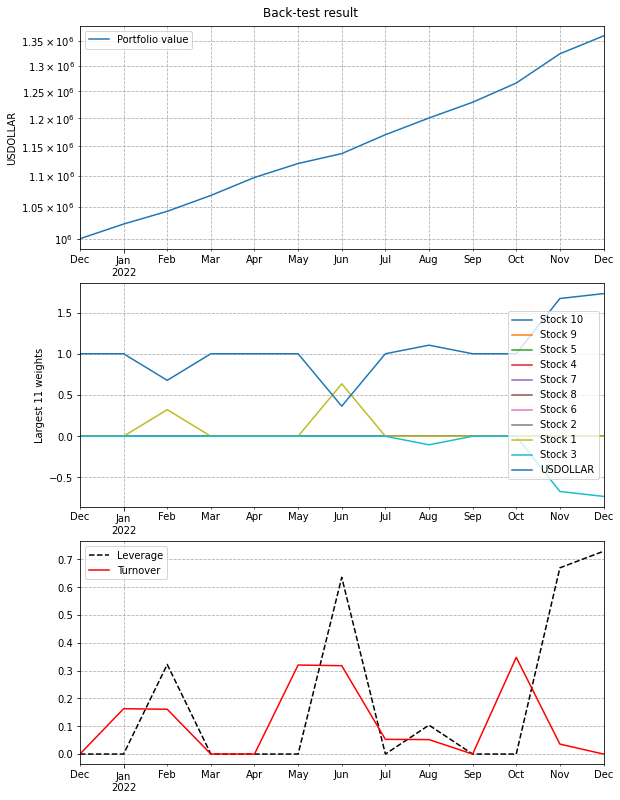

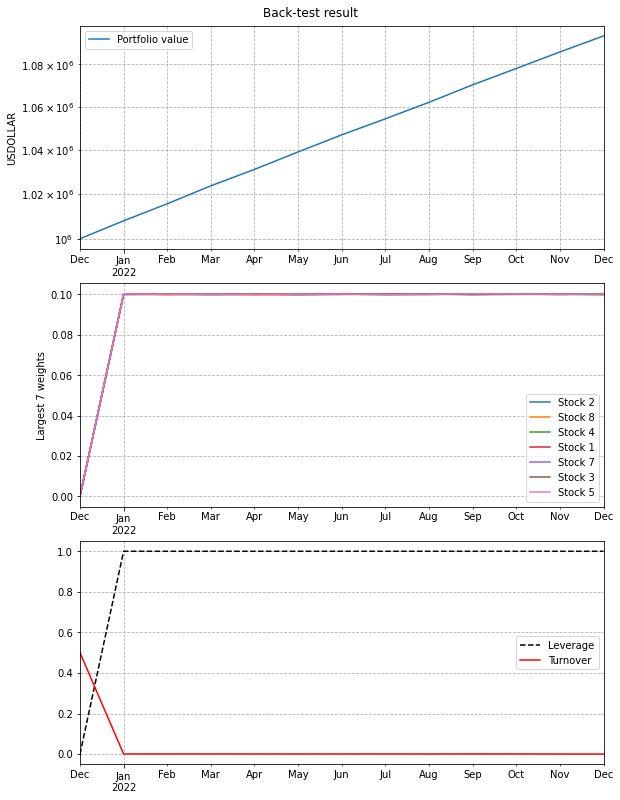

In [115]:
# print multi-period result
print("\n# MULTI-PERIOD OPTIMIZATION\n")
print(results[0])

# print uniform allocation result
print("\n# UNIFORM ALLOCATION:\n")
print(results[1])

# plot value and weights of the portfolio in time for MPO
mpo_figure = results[0].plot(how_many_weights=11)

# plot value and weights of the portfolio in time for uniform
uniform_figure = results[1].plot()

In [22]:
# Historical Data

# Initialize stock market simulator
# simulator = cvx.StockMarketSimulator(
#     ['AAPL', 'AMZN', 'UBER', 'ZM', 'CVX', 'GM', 'ABNB', 'CTAS', 'GOOG', 'BX'])

simulator = cvx.UserProvidedMarketData(returns = ret)

# Change Covariance to know value for new simulator
# change_cov

# Create objective function and constraints to the optimization problem

constraints = []
gamma_trade = 2.5
gamma_hold = 2.5

def make_policy(gamma_trade, gamma_risk, constraints):
    return cvx.MultiPeriodOptimization(cvx.ReturnsForecast()
                                       - gamma_trade * cvx.StocksTransactionCost()
                                       - gamma_hold * cvx.StocksHoldingCost() - cvx.FullCovariance(),
                                          constraints, planning_horizon=12)

policy = make_policy(1, 1, constraints)

# objective = cvx.ReturnsForecast()
#             - gamma_trade * cvx.StocksTransactionCost() - gamma_hold * cvx.StocksHoldingCost()
#             - cvx.FullCovariance()

# Initialize policy
# policy = cvx.MultiPeriodOptimization(objective, constraints, planning_horizon=12)

# backtest
results = simulator.backtest_many([policy, cvx.Uniform()], start_time='2021-07-01', end_time='2022-07-01')

AttributeError: 'RangeIndex' object has no attribute 'tz'


# MULTI-PERIOD OPTIMIZATION


###########################################################
Universe size                                            11
Initial timestamp                       2021-12-01 00:00:00
Final timestamp                         2022-12-01 00:00:00
Number of periods                                        13
Initial value (USDOLLAR)                          1.000e+06
Final value (USDOLLAR)                            1.360e+06
Profit (USDOLLAR)                                 3.597e+05
                                                           
Avg. return (annualized)                              33.7%
Volatility (annualized)                                2.5%
Avg. excess return (annualized)                        0.6%
Avg. active return (annualized)                        0.6%
Excess volatility (annualized)                         2.4%
Active volatility (annualized)                         2.4%
                                                           
Avg. grow

/Users/treyhensel/opt/anaconda3/lib/python3.7/site-packages/cvxportfolio/result.py:987: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() # pragma: no cover


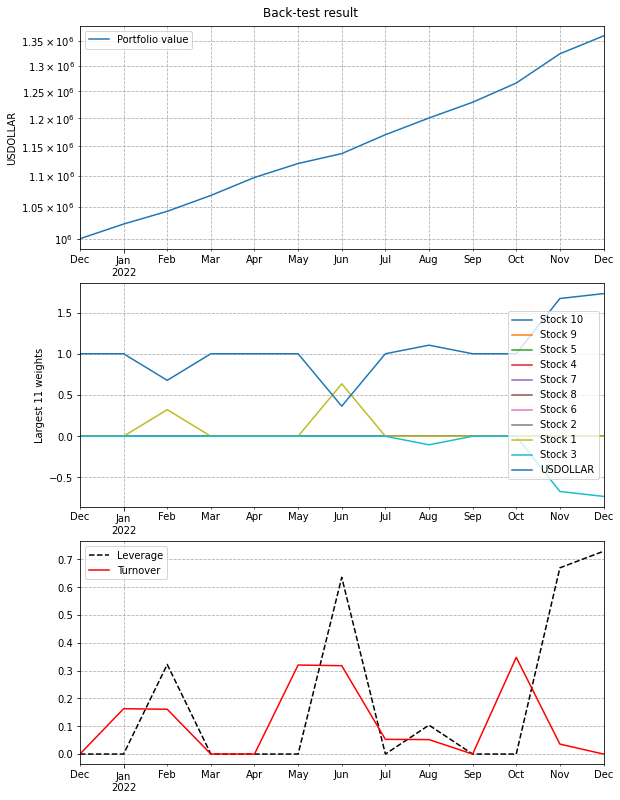

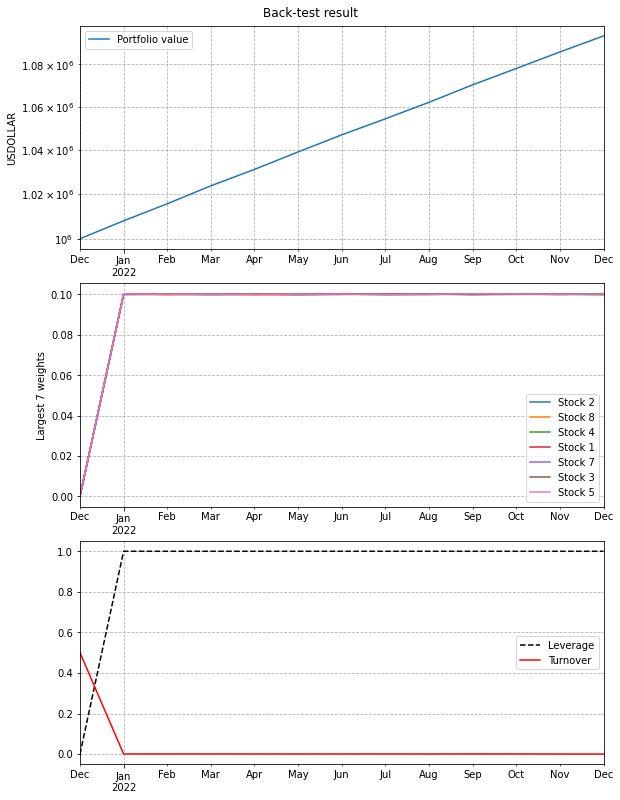

In [114]:
# print multi-period result
print("\n# MULTI-PERIOD OPTIMIZATION\n")
print(results[0])

# print uniform allocation result
print("\n# UNIFORM ALLOCATION:\n")
print(results[1])

# plot value and weights of the portfolio in time for MPO
mpo_figure = results[0].plot(how_many_weights=11)

# plot value and weights of the portfolio in time for uniform
uniform_figure = results[1].plot()

In [21]:
# Historical Data + Known Volatility

# Initialize stock market simulator
simulator = cvx.StockMarketSimulator(
    ['AAPL', 'AMZN', 'UBER', 'ZM', 'CVX', 'GM', 'ABNB', 'CTAS', 'GOOG'])

# Change Covariance to know value for new simulator
# change_cov

# Create objective function and constraints to the optimization problem

constraints = [cvx.LeverageLimit(1)]
gamma_trade = 1
gamma_hold = 1

def make_policy(gamma_trade, gamma_risk, constraints):
    cov = cvx.forecast.HistoricalFactorizedCovariance()
    return cvx.MultiPeriodOptimization(cvx.ReturnsForecast()
                                       - gamma_trade * cvx.StocksTransactionCost()
                                       - gamma_hold * cvx.StocksHoldingCost() - cvx.FullCovariance(),
                                          constraints, planning_horizon=12)

policy = make_policy(1, 1, constraints)

# objective = cvx.ReturnsForecast()
#             - gamma_trade * cvx.StocksTransactionCost() - gamma_hold * cvx.StocksHoldingCost()
#             - cvx.FullCovariance()

# Initialize policy
# policy = cvx.MultiPeriodOptimization(objective, constraints, planning_horizon=12)

# backtest
results2 = simulator.backtest_many([policy, cvx.Uniform()], start_time='2021-07-01')

Updating data.........



# MULTI-PERIOD OPTIMIZATION


#################################################################
Universe size                                                  10
Initial timestamp                       2021-07-01 13:30:00+00:00
Final timestamp                         2024-03-25 13:30:00+00:00
Number of periods                                             687
Initial value (USDOLLAR)                                1.000e+06
Final value (USDOLLAR)                                  5.177e+05
Profit (USDOLLAR)                                      -4.823e+05
                                                                 
Avg. return (annualized)                                   -19.5%
Volatility (annualized)                                     30.1%
Avg. excess return (annualized)                            -22.4%
Avg. active return (annualized)                            -22.4%
Excess volatility (annualized)                              30.1%
Active volatility (annualized)               

/Users/treyhensel/opt/anaconda3/lib/python3.7/site-packages/cvxportfolio/result.py:987: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() # pragma: no cover
/Users/treyhensel/opt/anaconda3/lib/python3.7/site-packages/cvxportfolio/result.py:987: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() # pragma: no cover


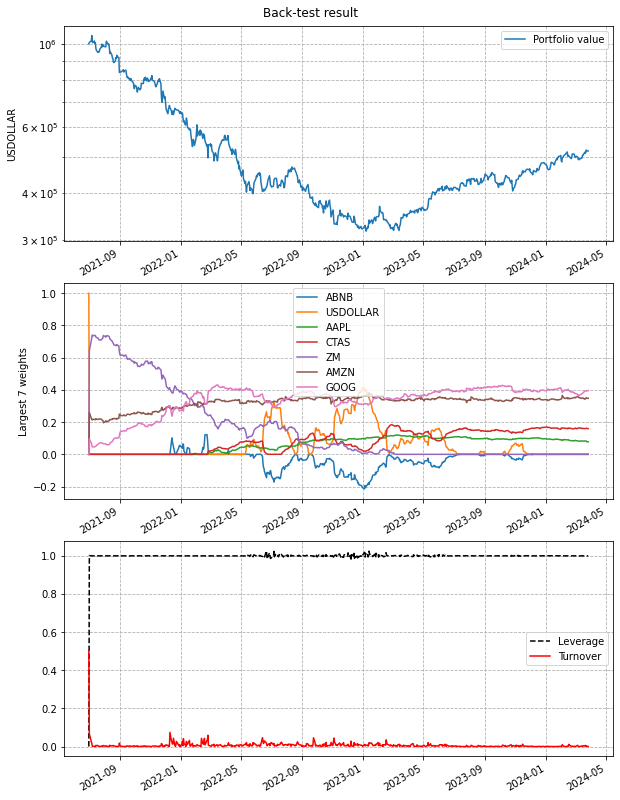

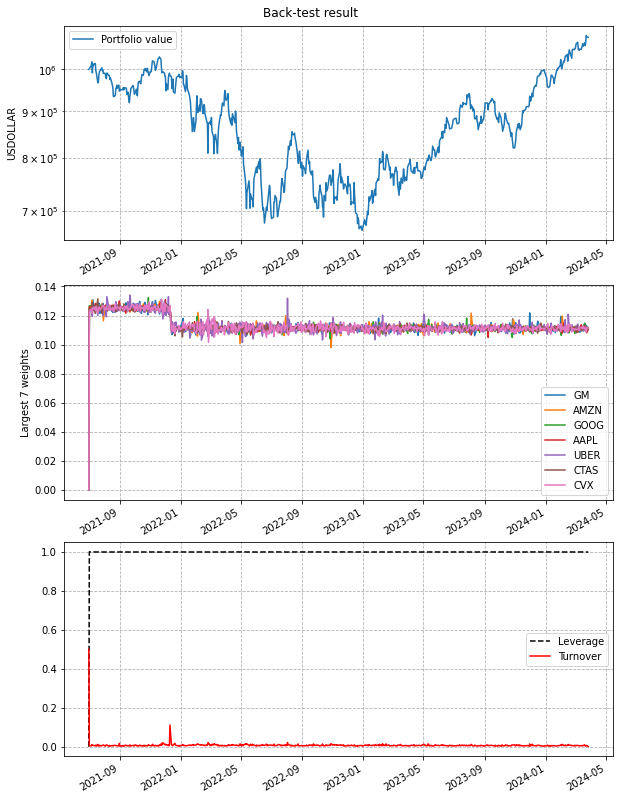

In [22]:
# print multi-period result
print("\n# MULTI-PERIOD OPTIMIZATION\n")
print(results2[0])

# print uniform allocation result
print("\n# UNIFORM ALLOCATION:\n")
print(results2[1])

# plot value and weights of the portfolio in time for MPO
mpo_figure = results2[0].plot()

# plot value and weights of the portfolio in time for uniform
uniform_figure = results2[1].plot()

In [14]:
yf.Ticker("MSFT").history(period="15y")
# yf.download("SPY AAPL", period="15y")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-03-23 00:00:00-04:00,12.937216,13.845874,12.892527,13.652225,71600000,0.0,0.0
2009-03-24 00:00:00-04:00,13.436231,13.562846,13.287270,13.354302,50044100,0.0,0.0
2009-03-25 00:00:00-04:00,13.391545,13.637329,13.048936,13.317064,73927100,0.0,0.0
2009-03-26 00:00:00-04:00,13.533061,14.061870,13.495821,14.024631,63775100,0.0,0.0
2009-03-27 00:00:00-04:00,13.808644,13.868229,13.443690,13.503274,47670400,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-14 00:00:00-04:00,420.239990,427.820007,417.989990,425.220001,34157300,0.0,0.0
2024-03-15 00:00:00-04:00,419.290009,422.600006,412.790009,416.420013,45049800,0.0,0.0
2024-03-18 00:00:00-04:00,414.250000,420.730011,413.779999,417.320007,20106000,0.0,0.0


In [7]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
tickers = df['Symbol'][:100].tolist()  # Select top 100 stocks

# Define start and end dates
start_date = '2012-01-01'
end_date = '2022-12-31'

# Fetch data for each ticker
stock_data = {}
for ticker in tickers:
    try:
        stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)
    except Exception as e:
        print(f"Failed to fetch data for {ticker}: {e}")

# Combine data into a single DataFrame
all_data = pd.concat(stock_data.values(), keys=stock_data.keys(), names=['Ticker', 'Date'])

# Reset index
all_data.reset_index(inplace=True)

# Save data to a CSV file
all_data.to_csv('sp500_stock_data.csv', index=False)

In [65]:
stock_data = pd.read_csv('sp500_stock_data.csv')
hist = stock_data[stock_data['Date'] < '2022-01-01'][['Ticker', 'Adj Close']]
now = stock_data[stock_data['Date'] >= '2022-01-01'][['Ticker', 'Adj Close']]

daily_vol = {}
for i in set(hist['Ticker']):
    temp = hist[hist['Ticker'] == i]
    temp_vol = np.var(temp['Adj Close'].pct_change()[1:])
    daily_vol[i] = [temp_vol, np.var(now[now['Ticker'] == i]['Adj Close'].pct_change()[1:])]

In [77]:
daily_vol

{'CE': [0.00036463827509272825, 0.0006523800930277537],
 'APH': [0.0002118702711436735, 0.0003496105558527149],
 'AMCR': [0.000245666263026517, 0.00030373839368170243],
 'ABBV': [0.0003032131503110791, 0.00019882878052708178],
 'AME': [0.00021954347247663775, 0.00023698329701517452],
 'BXP': [0.00026390488694413963, 0.000352799991072344],
 'CCL': [0.0008737140133712739, 0.002342751796045268],
 'AAL': [0.001016218504128589, 0.0012514713066632973],
 'ADP': [0.00019208093234867688, 0.0003172246620931941],
 'AFL': [0.00025031311233680056, 0.00022028366913047652],
 'A': [0.0002477765306896281, 0.0004947595430367234],
 'AIZ': [0.0002466073579932621, 0.00033778172308433676],
 'BX': [0.0003755292614587479, 0.0011440712108818584],
 'TECH': [0.0002509151178252713, 0.0006706060488149272],
 'COR': [0.0002594817919524876, 0.00022069266910727838],
 'BIO': [0.0002622713911176844, 0.0006617884785091816],
 'ANET': [0.0007582836922234597, 0.0007323338973656167],
 'AMP': [0.00041811062295275315, 0.000500

In [76]:
diff_dict = {}

# Iterate through each key-value pair in the original dictionary
for key, value in daily_vol.items():
    # Calculate the differences between consecutive elements in the list
    difference = value[1] - value[0]
    # Store the differences in the new dictionary
    diff_dict[key] = difference
dict(sorted(diff_dict.items(), key=lambda item: item[1]))

{'CARR': -0.00044580173705166017,
 'CNC': -0.00012200119641389665,
 'ABBV': -0.00010438436978399732,
 'AKAM': -9.583852578589188e-05,
 'BLDR': -8.610020058669675e-05,
 'BMY': -7.724581448034594e-05,
 'AMGN': -5.988638122694353e-05,
 'CNP': -5.016792253490811e-05,
 'COR': -3.8789122845209195e-05,
 'AFL': -3.0029443206324038e-05,
 'ANET': -2.5949794857843002e-05,
 'BSX': -1.5724840103786017e-05,
 'CAH': -5.068539675305149e-06,
 'AME': 1.7439824538536766e-05,
 'BAC': 1.8725940848763516e-05,
 'AEE': 1.8847685985422388e-05,
 'CPB': 2.392174453211981e-05,
 'AIG': 2.6279383363646367e-05,
 'CBOE': 3.190598957063633e-05,
 'ATO': 4.943447397180365e-05,
 'AMCR': 5.807213065518545e-05,
 'CBRE': 6.0258102093495975e-05,
 'CDW': 6.652762232701439e-05,
 'BDX': 6.984107082535899e-05,
 'MO': 7.03420336790689e-05,
 'AEP': 7.112772122159721e-05,
 'AVB': 8.05598026980011e-05,
 'ACGL': 8.184518300717036e-05,
 'AMP': 8.19267572719117e-05,
 'CPT': 8.332476345248219e-05,
 'LNT': 8.49630492514658e-05,
 'ABT': 8

Updating data..........

# MULTI-PERIOD OPTIMIZATION
 
#################################################################
Universe size                                                  11
Initial timestamp                       2020-01-02 14:30:00+00:00
Final timestamp                         2024-03-25 13:30:00+00:00
Number of periods                                            1064
Initial value (USDOLLAR)                                1.000e+06
Final value (USDOLLAR)                                  3.121e+06
Profit (USDOLLAR)                                       2.121e+06
                                                                 
Avg. return (annualized)                                    32.8%
Volatility (annualized)                                     34.3%
Avg. excess return (annualized)                             30.9%
Avg. active return (annualized)                             30.9%
Excess volatility (annualized)                              34.3%
Active volatility (an

/Users/treyhensel/opt/anaconda3/lib/python3.7/site-packages/cvxportfolio/result.py:987: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() # pragma: no cover
/Users/treyhensel/opt/anaconda3/lib/python3.7/site-packages/cvxportfolio/result.py:987: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show() # pragma: no cover


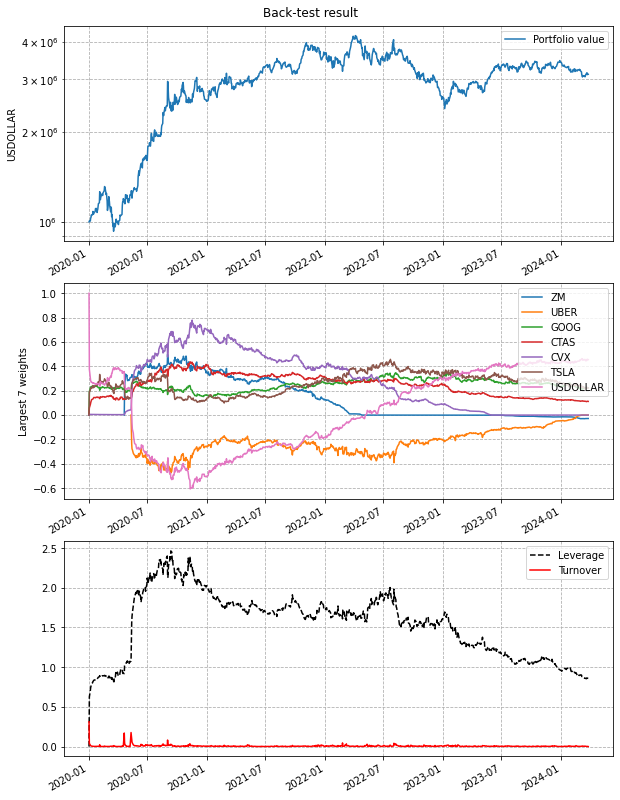

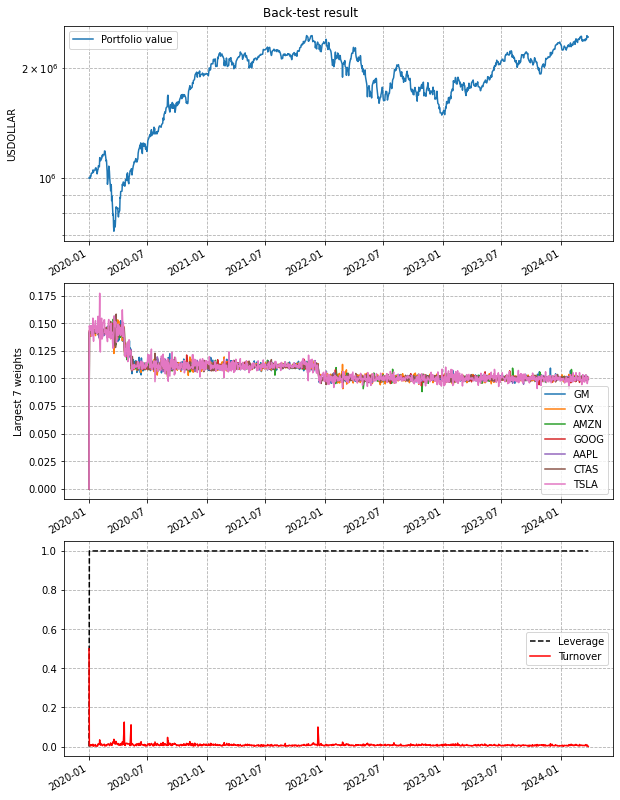

In [4]:
# risk aversion parameter (Chapter 4.2)
# chosen to match resulting volatility with the
# uniform portfolio (for illustrative purpose)
gamma = 2.5

# covariance forecast error risk parameter (Chapter 4.3)
# this can help regularize a noisy covariance estimate
kappa = 0.05

objective = cvx.ReturnsForecast() - gamma * (
    cvx.FullCovariance() + kappa * cvx.RiskForecastError()
) - cvx.StocksTransactionCost()

constraints = [cvx.LeverageLimit(3)]

policy = cvx.MultiPeriodOptimization(objective, constraints, planning_horizon=2)

simulator = cvx.StockMarketSimulator(
    ['AAPL', 'AMZN', 'UBER', 'ZM', 'CVX', 'TSLA', 'GM', 'ABNB', 'CTAS', 'GOOG'])

results = simulator.backtest_many([policy, cvx.Uniform()], start_time='2020-01-01')

# print statistics result of the backtest
print("\n# MULTI-PERIOD OPTIMIZATION\n", results[0])
print("\n# UNIFORM ALLOCATION:\n", results[1])

# plot value and weights of the portfolio in time for MPO
results[0].plot()

# we use this to save the plots for the documentation
if 'CVXPORTFOLIO_SAVE_PLOTS' in os.environ:
    plt.savefig('hello_world.png')

# plot value and weights of the portfolio in time for uniform
results[1].plot()

if 'CVXPORTFOLIO_SAVE_PLOTS' in os.environ:
    plt.savefig('hello_world_uniform.png')
else:
    plt.show()

In [3]:
print(yf.download('AAPL', start='2022-01-01', end='2022-12-31'))

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.724564   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.443558   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.723587   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.840225   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.008087   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  130.959961   
2022-12-27  131.380005  131.410004  128.720001  130.029999  129.142456   
2022-12-28  129.669998  131.029999  125.870003  126.040001  125.179688   
2022-12-29  127.989998  130.479996  127.730003  129.610001  128.725311   
2022-12-30  128.410004  129.949997  127.430000  129.929993  129.043137   

               Volume  
Date         